<h1 style="text-align:center;">Introdução à Otimização &ndash; Professor Amit Bhaya &ndash; 2020/2</h1>
<h2 style="text-align:center;">Lista 3</h2>
<h2 style="text-align:center;">Entrega: 03 de junho de 2021, 09:55h

### Esta lista versa sobre regularização, regressão $L_1$, tradeoffs, QP, SOCP, programação convexa

### Problema 1 (Regressão $L_2$ versus regressão $L_1$):
É comum encontrar conjuntos de dados contendo *outliers*, ou seja, dados ruins oriundos de erro experimental, ruido alto ou malfuncionamento de sensores. Considere por exemplo o seguinte conjunto de 15 pares $(x,y)$ de pontos experimentais:


|x |	1 |	2 |	3 |	4 |	5 |	6 |	7 |	8 |	9 |	10 |	11 |	12 |	13 |	14 |	15 |
|--|------|---|---|---|---|---|---|---|---|----|-------|-------|-------|-------|-------|
|y |	6.31 |	3.78 |	24 |	1.71 |	2.99 |	4.53 |	2.11 |	3.88 |	4.67 |	4.25 |	2.06 |	23 |	1.58 |	2.17 |	0.02  |

Os valores de $y$ correspondentes a $x=3$ and $x=12$ são outliers porque estão muito distantes do intervalo de valores esperado no experimento.

(a) Compute a reta de melhor ajuste usando um custo $L_2$ cost (i.e., mínimos quadrados). Ou seja, encontre $a$ e $b$ that que minimizem a expressão:
$$
	L_2~\mbox{custo}:~\sum_{i=1}^{15} (y_i - ax_i - b)^2
$$

Repita o cálculo da reta de melhor ajuste, porém, desta vez, exclua os outliers do conjunto de dados. No mesmo plot, mostre os dados (todos) e ambas retas de melhor ajuste. Explique a diferença entre as duas retas de melhor ajuste.

(b) Nem sempre é possível remover outliers manualmente. Vamos investigar um método auotmático de reduzir o efeito de outliers, através da troca da função objetivo. Encontre a reta de melhor ajuste de novo (**sem** retirar os outliers), porém desta vez utilize a função de custo $L_1$:
$$
	L_1~\mbox{custo}:~\sum_{i=1}^{15} \left| y_i - ax_i - b \right|
$$
Plote os dados bem como a reta de melhor ajuste $L_1$. O que você observa sobre a influência de outliers na reta de melhor ajuste $L_1$? O custo $L_1$ lida melhor com outliers do que o método de mínimos quadrados? Explique sua resposta. 

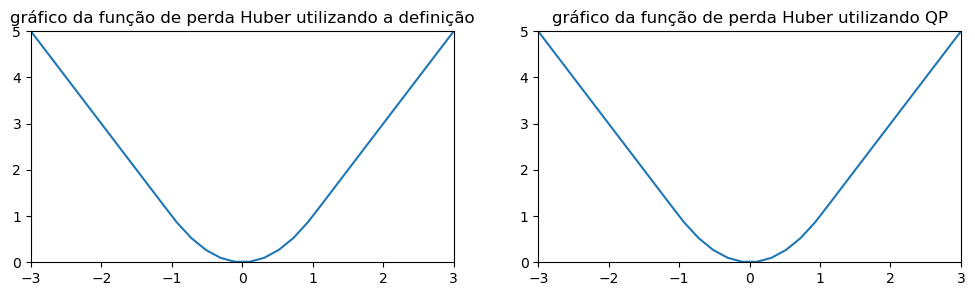

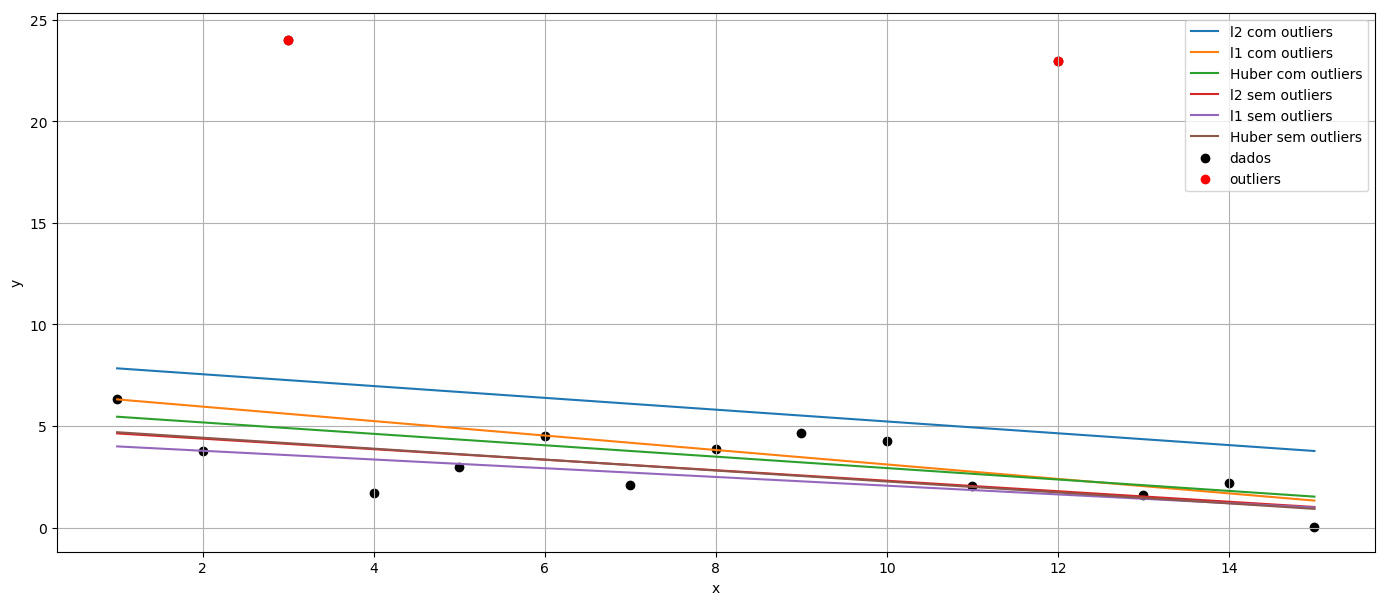

In [ ]:
using JuMP, Ipopt, Clp, LinearAlgebra, PyPlot

y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]
x = 1:15

# Código para a primeira parte (letra a)

# Encontrar ajuste L2 (mínimos quadrados) utilizando todos os dados
c = [1:15]
L = length(c)
#Montagem da matriz regressora
A = [x ones(length(x))]
m = Model(with_optimizer(Ipopt.Optimizer,print_level=0) )
@variable(m, z[1:2]) #Variáveis de decisão z[1] = a, z[2] = b
@objective(m, Min, sum( (y - A*z).^2 ) ) #z é o vetor dos coeficientes a ser determinado

optimize!(m)
zopt = JuMP.value.(z)
a1 = zopt[1]
b1 = zopt[2]
#println("a1 = ", a1)
#println("b1 = ", b1)
#println("ax + b1 = ", a1*x + b1*ones(length(x)))

# Código para o segundo item da primeira parte (letra a)
yy = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]
#Remover outliers manualmente
y1 = deleteat!(yy,3)
yw = deleteat!(y1,11)

#Reduzir tamanho do vetor x, correspondendo a remoção dos outliers
xw = 1:length(yw)

#Montar matriz regressora
Aw = [xw ones(length(xw))]

# Ajuste mínimos quadrados sem outliers
mwo = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
@variable(mwo, w[1:2])
@objective(mwo, Min, sum( (yw - Aw*w).^2 ) );

optimize!(mwo)
wopt = JuMP.value.(w)
a2 = wopt[1]
b2 = wopt[2]

#println("a2 = ", a2)
#println("b2 = ", b2)
#println("a2x + b2 = ", a2*x + b2*ones(length(x)))

#Código para a segunda parte

# Encontrar ajuste L1 utilizando todos os dados
ml1 = Model(with_optimizer(Clp.Optimizer,LogLevel=0))
@variable(ml1, a3)
@variable(ml1, b3)
@variable(ml1, t[1:15] >= 0)
for i in 1:length(x)
    @constraint(ml1, y[i] - a3*x[i] - b3 <=  t[i])
    @constraint(ml1, y[i] - a3*x[i] - b3 >= -t[i])
end
@objective(ml1, Min, sum(t))
optimize!(ml1)
a3 = JuMP.value.(a3)
b3 = JuMP.value.(b3)
#println("a3 = ", a3)
#println("b3 = ", b3)
#println("a3x + b3 = ", a3*x + b3*ones(length(x)))

# find the L1 fit REMOVING OUTLIERS

ml1wo = Model(with_optimizer(Clp.Optimizer,LogLevel=0))
@variable(ml1wo, a3w)
@variable(ml1wo, b3w)
@variable(ml1wo, tw[1:length(xw)] >= 0)
for i in 1:length(xw)
    @constraint(ml1wo, yw[i] - a3w*xw[i] - b3w <=  tw[i])
    @constraint(ml1wo, yw[i] - a3w*xw[i] - b3w >= -tw[i])
end
@objective(ml1wo, Min, sum(tw))
optimize!(ml1wo)
a4 = JuMP.value.(a3w)
b4 = JuMP.value.(b3w)
#println("a4 = ", a4)
#println("b4 = ", b4)
#println("a4x + b4 = ", a4*x + b4*ones(length(x)))

M = 1
hx = range(-3,stop=3,length=30)

# compute Huber loss using formula
hy1 = zeros(size(hx))
for (i,xx) in enumerate(hx)
    if abs(xx) <= M
        hy1[i] = xx^2
    else
        hy1[i] = 2*M*abs(xx) - M^2
    end
end

# compute Huber loss using QP
hy2 = zeros(size(hx))
for (i,xx) in enumerate(hx)
    mh = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
    @variable(mh, v >= 0)
    @variable(mh, w <= M)
    @constraint(mh, abs(xx) <= v + w)
    @objective(mh, Min, w^2 + 2*M*v)
    optimize!(mh)
    hy2[i] = JuMP.objective_value(mh)
end

#using PyPlot
figure(figsize = (12,3))

subplot(1,2,1)
plot(hx,hy1)
axis([-3,3,0,5])
title("gráfico da função de perda Huber utilizando a definição")

subplot(1,2,2)
plot(hx,hy2)
axis([-3,3,0,5])
title("gráfico da função de perda Huber utilizando QP")

# PART C code

# find the Huber fit using ALL the data points
#c = [1:15]
mhf = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
@variable(mhf, ah)
@variable(mhf, bh)
@variable(mhf, v[1:15] >= 0)
@variable(mhf, w[1:15] <= M)
for i in 1:length(x)
 @constraint(mhf, y[i] - ah*x[i] - bh <=  w[i] + v[i])
 @constraint(mhf, y[i] - ah*x[i] - bh >= -w[i] - v[i])
end
@objective(mhf, Min, sum(w.^2) + 2*M*sum(v))
optimize!(mhf)
a5 = JuMP.value.(ah)
b5 = JuMP.value.(bh)
#println("a5 = ", a5)
#println("b5 = ", b5)
#println("a5x + b5 = ", a5*x + b5*ones(length(x)))

# find the Huber fit REMOVING OUTLIERS

mhfwo = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
@variable(mhfwo, as)
@variable(mhfwo, bs)
@variable(mhfwo, v[1:length(xw)] >= 0)
@variable(mhfwo, w[1:length(xw)] <= M)
for i in 1:length(xw)
@constraint(mhfwo, yw[i] - as*xw[i] - bs <=  w[i] + v[i])
@constraint(mhfwo, yw[i] - as*xw[i] - bs >= -w[i] - v[i])
end
@objective(mhfwo, Min, sum(w.^2) + 2*M*sum(v))
optimize!(mhfwo)
a6,b6 = JuMP.value.(as),JuMP.value.(bs)


# Make all the plots

using PyPlot
figure(figsize = (17,7))
scatter(x,y,label="dados",color = "black")
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red") # outliers
plot(x, a1*x + b1*ones(length(x)),label="l2 com outliers")
plot(x, a3*x + b3*ones(length(x)),label="l1 com outliers")
plot(x, a5*x + b5*ones(length(x)),label="Huber com outliers")
plot(x, a2*x + b2*ones(length(x)),label="l2 sem outliers")
plot(x, a4*x + b4*ones(length(x)),label="l1 sem outliers")
plot(x, a6*x + b6*ones(length(x)),label="Huber sem outliers")
legend(loc ="best")
ylabel("y")
xlabel("x")
grid()



### Problema 2 (QP): (Continuação do problema anterior)
Outra abordagem é utilizar custo $L_2$ para pontos próximos à reta, porém custo $L_1$ para pontos que estão longes da reta. Especificamente, seguindo o estatístico Huber, define-se a função de custo:
\begin{equation}
\phi(x) =
    \left\{
        \begin{array}{l}
            x^2, \quad \text{if}~-M \leq x \leq M \\
            2M|x| - M^2 \quad \text{senão}
        \end{array}
     \right.
\end{equation}
Embora a fórmula seja simples, ela precisa ser manipulada para que fique no formato de um programa quadrático e convexo, e essa manipulação resulta no seguinte QP convexo:
\begin{equation}
\phi(x) =
    \left\{
        \begin{array}{l}
            \text{minimize}_{v,w}~ w^2 + 2 Mv \\
            \text{sujeito a}~|x| \leq w + v \\
            \qquad v \geq 0, w \leq M
        \end{array}
     \right.
\end{equation}
Utilize $M=1$, e plote a função $\phi(x), -3 \leq x \leq 3$ gerada por ambas as expressões acima e verifique que são, de fato, equivalentes. Finalmente, encontre a reta de melhor ajuste aos dados especificados em Q.1, plotando seu resultado. A função objetivo para esta parte é:
\begin{equation}
\sum_{i=1}^{15} \phi(y_i - ax_i - b)
\end{equation}

## Veja o código da Q.1

### Problema 3 (Tradeoff)
Deseja-se enviar uma sequência de entradas (tensões) ao manipulador do braço de um robô. Os dados se encontram no arquivo *voltages.csv* e estão plotados abaixo.

![image.png](attachment:image.png)

Mudanças bruscas (que ocorrem no gráfico das tensões mostrado acima) danificam os motores do manipulador, portanto deseja-se suavizar as transições (saltos) no sinal. Denotando as tensões por $v_i, i = 1, 2, \ldots, 200$, uma maneira de caracterizar suavidade do sinal é através da soma das diferenças ao quadrado:
\begin{equation}
    R(v) = (v_2 - v_1)^2 + (v_3 - v_2)^2 + \cdots + (v_{200} - v_{199})^2
\end{equation}
Quanto menor $R(v)$, mais suave o sinal. Formule e resolva um problema de mínimos quadrados regularizado que equilibra os dois objetivos de aproximar o sinal mostrado no gráfico acima, porém também impor um certo grau de suavidade. Explique seu raciocínio ao formular o modelo e inclua um gráfico comparando as tensões desejadas com as tensões suavizadas que você gerou através do seu modelo de mínimos quadrados regularizado.

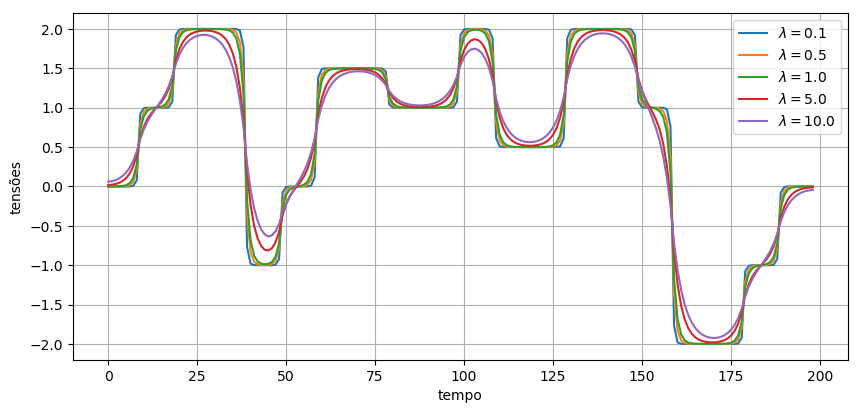

In [ ]:
# Leia o arquivo de dados
using CSV, JuMP, Ipopt
v = CSV.read("voltages.csv")
vvec = Matrix{Float64}(v)
n = length(vvec)


#Definição da matriz que cria o vetor de diferenças
dv = -ones(n)
ev = ones(n-1)
B = Matrix{Float64}(Bidiagonal(dv, ev, :U))
A = B[1:n-1,:] #Matriz A, aplicado ao vetor v = [v1, v2, v3, ...] cria o vetor de diferenças [v2-v1, v3-v2, ..]


# Define valores diferentes do parâmetro de regularização
lambdavals = [0.1, 0.5, 1, 5, 10]
k = length(lambdavals)
y = zeros(n,k)

for (i,lambda) = enumerate(lambdavals)
    m = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
    @variable(m, optv[1:n])
    @objective(m, Min, sum( (vvec - optv).^2 ) + lambda*sum( (A*optv).^2 ) )
    optimize!(m)
    y[:,i] = JuMP.value.(optv)
end
#Plote os gráficos das tensões suavizadas para os diferentes valores de lambda.
using PyPlot
figure(figsize=(10,4.5))
for (i,lambda) = enumerate(lambdavals)
    plot(y[:,i],label=string(L"\lambda = ", lambda))
end
legend(loc ="best")
ylabel("tensões")
xlabel("tempo");
grid()


### Problema 4 (SOCP)
A **mediana geométrica** de um conjunto de pontos $x_i, i = 1,\ldots , k$ em $R^2$ é o ponto $x$ que minimiza a soma das distâncias Euclideanas aos pontos $x_i$, Escreva o problema de encontrar a mediana geométrica de $k$ pontos em $R^2$ como um programa cônico de segunda ordem (SOCP).


### Resposta:

O problema 
$$
\min_x \sum_{i=1}^k \| x - x_i \|_2
$$
pode ser escrito como o SOCP
$$
\min_{x,t} \sum_{i=1}^k t_i \qquad \text{sujeito a}~ \| x- x_i \|_2 \leq t_i   , i = 1, \ldots , k
$$

### Problema 5 (Convexidade)
Considere o conjunto definido pelas desigualdades abaixo:
\begin{equation}
    \begin{array}{l}
        (x_1 \geq x_2 -1~\text{E}~x_2 \geq 0) \\
        \text{OU}~(x_1 \leq x_2 -1~\text{E}~x_2 \leq 0)
    \end{array}
\end{equation}

- Desenhe o conjunto -- ele é convexo?
- Mostre que ele pode ser descrito por uma única desigualdade quadrática do tipo $q(x) = x^\top Ax+2b^\top x + c \leq 0$, para uma matriz $A= A^\top \in R^{2 \times 2}$, e vetores $b \in R^2, c \in R$, que você vai calcular.
- Qual o envoltório convexo deste conjunto? 


### Respostas
- O conjunto não é convexo: $(0,1)$ e $(-2,0)$ pertencem a este conjunto, porém o ponto no meio $(-1,1/2)$ não pertence.
- Seja $q(x) = x_2 (x_2 - x_1 - 1)$. A expressão $q(x) \leq 0$ se e somente se os dois fatores possum sinais opostos. Pode-se escrever $q(x) = x^\top Ax + 2b^\top x + c$, sendo
\begin{equation}
 A = \pmatrix{0 & -1/2 \\-1/2 & 1}, b = \pmatrix{0 \\ -1/2}, c = 0
\end{equation}
- O envoltório convexo é o plano completo $R^2$.